<h1>正则表达式</h1>
<ol>
    <li>
        <a href = "#正则的含义">正则的含义</a> 
    </li>
    <li>
        <a href = "#正则表达式的应用场景">正则表达式的应用场景</a> 
    </li>
    <li>
        <a href = "#元字符">元字符</a> 
    </li>
    <li>
        <a href = "#反义代码">反义代码</a> 
    </li>
    <li>
        <a href = "#限定符">限定符</a> 
    </li>
    <li>
        <a href = "#分组匹配">分组匹配</a> 
    </li>
    <li>
        <a href = "#贪婪与非贪婪">贪婪与非贪婪</a> 
    </li>
    <li>
        <a href = "#分支条件匹配">分支条件匹配</a> 
    </li>
    <li>
        <a href = "#零宽断言">零宽断言</a> 
    </li>
    <li>
        <a href="#实例展示">实例展示</a>
    </li>
</ol>

## 正则的含义
- 正则表达式是用来操作字符串的一种逻辑公式

## 正则表达式的应用场景
- 数据分析时，数据获取的文本筛选
- 写爬虫代码时，网页数据的匹配
- 写前端代码时（html）,用户输入的数据验证（手机号/邮箱的判断）
- 测试人员在请求接口时
- 批量文本编辑，比如在sublime text或notepad++等等笔记本软件中

### 常见格式验证
- 邮箱验证
- IP地址验证
- 电话号码验证
- 密码强度验证
- 网址验证
- 汉子验证，汉字的范围是：[\u4E00-\u9FA5]

<b>凡是有一定规律的，批量的数据获取，我们都可以使用正则表达式来完成</b>

### 正则表达式的演示

In [177]:
# 使用正则表达式，需要导入re库
import re
s = "百度网址：https://www.baidu.com/"
reg = "https://[w]{3}\.[a-z]*\.com"
re.findall(reg,s)

['https://www.baidu.com']

In [178]:
s = "百度网址：https://www.baidu.com/"
reg = "[\u4E00-\u9FA5]{0,}"
re.findall(reg,s)

['百度网址',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

# 元字符
|字符|说明|
|--|--|
|.|代表的是换行符（\n,\r\n）以外的任意字符|
|\w|匹配字母或数字或下划线或汉字的字符|
|\s|匹配任意的空白符|
|\d|匹配数字|
|^|匹配字符串的开始|
|$|匹配字符串的结束|

In [179]:
s = "百23度3334网54543址：https://www.baidu.com/"
re.findall('\d',s)

['2', '3', '3', '3', '3', '4', '5', '4', '5', '4', '3']

In [180]:
s = "百23度3334网54543址：https://www.baidu.com/"
re.findall('w',s)

['w', 'w', 'w']

In [181]:
s = "百23度33342网542543址：https://www.baidu.com/"
re.findall('^2',s)

[]

In [182]:
s = "2百23度33342网542543址：https://www.baidu.com/"
re.findall('^2',s)

['2']

In [183]:
s = "2百23度33342网542543址：https://www.baidu.com/"
re.findall('m$',s)

[]

In [184]:
s = "2百23度33342网542543址：https://www.baidu.com/"
re.findall('/$',s)

['/']

## 反义代码
### 就是与元字符相反的代码

|字符|说明|
|--|--|
|\W|匹配任意不是字母、数字、下划线、汉字的字符|
|\S|匹配任意不是空白符的字符|
|\D|匹配任意不是数字的字符|

## 限定符
- 限定某一个逻辑集合所出现的次数
|字符|说明|
|--|--|
|*|代表的是重复0次或者是多次|
|+|代表的是重复1次或者是多次|
|?|代表是重复0次或者是1次|
|{n}|重复n次的意思|
|{n,}|重复n次或者是更多次|
|{n,m}|重复n次到m次|

In [185]:
s = "百度网址：https://www.baidu.com/"
reg = "https://[w]{3}\.[a-z]*\.com" #[]代表一个逻辑的集合
re.findall(reg,s)

['https://www.baidu.com']

In [186]:
s = "百98度234网33址1356io3：https://www.baidu.com/"
reg = "\d{2}"
re.findall(reg,s)

['98', '23', '33', '13', '56']

In [187]:
s = "百98度234网33址1356io3：https://www.baidu.com/"
reg = "\d+"
re.findall(reg,s)

['98', '234', '33', '1356', '3']

## 分组匹配

In [188]:
s = "我的qq号码是:1203892273;my postcode: 150000"
reg = "\d{6,10}"
result = re.findall(reg,s)
# 注意这里的返回值是一个列表
result 

['1203892273', '150000']

In [189]:
result[0]

'1203892273'

In [190]:
reg = "(\d{10}).*(\d{6})"
result = re.findall(reg,s)
result

[('1203892273', '150000')]

In [191]:
# 分组
reg = "(\d{10}).*(\d{6})"
result = re.search(reg,s)
result

<re.Match object; span=(8, 38), match='1203892273;my postcode: 150000'>

In [192]:
result.group()

'1203892273;my postcode: 150000'

In [193]:
result.group(0)

'1203892273;my postcode: 150000'

In [194]:
result.group(1)

'1203892273'

In [195]:
result.group(2)

'150000'

## 贪婪与非贪婪
- 贪婪：尽可能多的匹配
- 非贪婪：尽可能少的匹配
- 非贪婪匹配的操作符是？
  


|字符|说明|
|--|--|
|*|代表的是重复0次或者是多次|
|+|代表的是重复1次或者是多次|
|?|代表是重复0次或者是1次|

??:代表的是匹配1次


- 贪婪和非贪婪对限定符做出了一些限制

In [196]:
s = "百98度234网33址1356io3：https://www.baidu.com/"
reg = "\d*"
re.findall(reg,s)

['',
 '98',
 '',
 '234',
 '',
 '33',
 '',
 '1356',
 '',
 '',
 '3',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [197]:
# 默认是贪婪匹配
s = "baidududududuuu"
reg = "du"
re.findall(reg,s)

['du', 'du', 'du', 'du', 'du']

In [198]:
s = "baidududududduuu"
reg = "du?"
re.findall(reg,s)

['du', 'du', 'du', 'du', 'd', 'du']

In [199]:
s = "baidududududduuu"
reg = "[du]?"
re.findall(reg,s)

['',
 '',
 '',
 'd',
 'u',
 'd',
 'u',
 'd',
 'u',
 'd',
 'u',
 'd',
 'd',
 'u',
 'u',
 'u',
 '']

In [200]:
s = "baidududududduuu"
reg = "(du)?"
re.findall(reg,s)

['', '', '', 'du', 'du', 'du', 'du', '', 'du', '', '', '']

In [201]:
s = "baidududududduuu"
reg = "(du)*?"
re.findall(reg,s)

['', '', '', '', 'du', '', 'du', '', 'du', '', 'du', '', '', 'du', '', '', '']

In [202]:
s = "baidududududduuu"
reg = "(du)??"
re.findall(reg,s)

['', '', '', '', 'du', '', 'du', '', 'du', '', 'du', '', '', 'du', '', '', '']

## 分支条件匹配

In [203]:
# 条件1 或 条件2
s = """
5c7145a5397be4c5251a4873,1,2,西罗园,北京,丰台,1101.0,西南,1,近地铁 集中供暖,整租 · 
南三环边木樨园桥西宝汇苑带车位西南向两居室！https://m.lianjia.com/chuzu/bj/zufang/BJ2189661772565184512.html,
72,6000,元/月,宝汇苑,整租
"""

# 分支条件匹配书写正则表达式所需要注意的点
# 条件限定时，范围越小的，也就是越难满足的要写在前边
# 因为多条件匹配的时候，匹配规则是从左到右，如果满足了左边的规则，那么右边就不去看了

reg = '\d{4}|\d{3}'
re.findall(reg,s)

['7145',
 '5397',
 '5251',
 '4873',
 '1101',
 '2189',
 '6617',
 '7256',
 '5184',
 '512',
 '6000']

## 零宽断言
|符号(reg代表着一个正则表达式)|说明|
|--|--|
|(?=reg)|匹配正则表达式前边的内容|
|(?<=reg)|匹配正则表达式后边的内容|
|(?!reg)|匹配后边跟的不是正则表达式的内容|
|(?<!reg)|匹配前边不是正则表达式的内容|

In [225]:
s = """
5c714e1f397be4c5251a7185,1,1,武夷花园,北京,通州,,西,0,精装 集中供暖 随时看房,整租 · 京贸中心大开间，窗户是大落地窗，
看房随时https://m.lianjia.com/chuzu/bj/zufang/BJ2136262410049159168.html,72,3500,元/月,京贸中心,整租
"""
reg = ",(?=整租$)"
re.findall(reg,s)

[',']

In [226]:
# 匹配hello中的lo
s = "helloworldilove"
reg = "lo(?=world)" # 匹配后面是world的lo
re.findall(reg,s)

['lo']

In [227]:
# 匹配world之后的所有字母
s = "helloworldilove"
reg = "(?<=world)[a-z]*" # 匹配 world后面的所有字母
re.findall(reg,s)

['ilove']

In [228]:
# 匹配love中的lo
s = "helloworldilove"
reg = "lo(?!world)" # 匹配后面不是world的咯
re.findall(reg,s)

['lo']

In [229]:
s = "helloworldilove"
reg = '(?<!worldil)o'# 匹配前面不是worldil的o,这里生成的o不包含love中的o
re.findall(reg,s)

['o', 'o']

## 实例展示

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('旅游.csv',index_col =0)
df.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25


In [10]:
# 提取酒店评分
df['酒店评分'] = df['酒店'].str.extract('(\d\.\d)分/5分')
df.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间,酒店评分
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05,4.7
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.0
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05,4.5
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35,4.6
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25,4.1


In [11]:
# 提取酒店等级
df['酒店等级'] = df['酒店'].str.extract(' (.+) ')
df.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间,酒店评分,酒店等级
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05,4.7,舒适型
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.0,经济型
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05,4.5,舒适型
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35,4.6,舒适型
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25,4.1,高档型


In [12]:
# 提取天数
df['天数'] = df['路线名'].str.extract('(\d)天\d晚') 
df.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间,酒店评分,酒店等级,天数
0,哈尔滨,北海,2208.0,650.0,哈尔滨-北海3天2晚 | 入住北海祥丰嘉年华大酒店 + 春秋航空往返机票,北海祥丰嘉年华大酒店 舒适型 4.7分/5分,标准双人间(双床) 双床 不含早 1间2晚,春秋航空 9C8741,直飞,17:10-21:50,春秋航空 9C8742,直飞,10:20-15:05,4.7,舒适型,3
1,成都,泸沽湖,1145.0,376.0,成都-泸沽湖3天2晚 | 入住7天酒店丽江古城中心店 + 成都航空往返机票,7天酒店丽江古城中心店 经济型 4.0分/5分,经济房-不含早-限时特... 其他 不含早 1间2晚,成都航空 EU2237,直飞,19:45-21:20,成都航空 EU2738,直飞,23:30-01:05,4.0,经济型,3
2,广州,沈阳,2702.0,618.0,广州-沈阳3天2晚 | 入住沈阳中煤宾馆 + 南方航空/深圳航空往返机票,沈阳中煤宾馆 舒适型 4.5分/5分,大床间(内宾) 大床 双早 1间2晚,南方航空 CZ6384,直飞,08:05-11:45,深圳航空 ZH9652,经停,08:20-13:05,4.5,舒适型,3
3,上海,九寨沟,1954.0,484.0,上海-九寨沟3天2晚 | 入住红原芸谊大酒店 + 成都航空往返机票,红原芸谊大酒店 舒适型 4.6分/5分,豪华双床房[双早] 双床 双早 1间2晚,成都航空 EU6678,直飞,21:55-01:15,成都航空 EU6677,直飞,17:45-20:35,4.6,舒适型,3
4,广州,天津,1608.0,422.0,广州-天津3天2晚 | 入住天津逸海明珠大酒店 + 奥凯航空/海南航空往返机票,天津逸海明珠大酒店 高档型 4.1分/5分,豪华双床房(预付) 双床 不含早 1间2晚,奥凯航空 BK2787,直飞,06:55-10:00,海南航空 HU7201,直飞,20:15-23:25,4.1,高档型,3


### 租房数据提取（练习）

In [13]:
rent = pd.read_csv('租房.csv')
rent.head()

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,rent_area,rent_price_listing,rent_price_unit,resblock_name,type
0,5c7145a5397be4c5251a4873,1,2,西罗园,北京,丰台,1101.0,西南,1,近地铁 集中供暖,整租 · 南三环边木樨园桥西宝汇苑带车位西南向两居室！https://m.lianjia.c...,72,6000,元/月,宝汇苑,整租
1,5c714bb4397be4c5251a65c3,2,3,通州北苑,北京,朝阳,132.0,东南,2,近地铁 集中供暖,天时名苑 3室2厅 11000元https://m.lianjia.com/chuzu/bj...,153,11000,元/月,天时名苑,整租
2,5c72b1e9397be4c5251e36fd,2,3,朝阳公园,北京,朝阳,296.0,东北,2,近地铁 精装 双卫生间,整租 · 丽水嘉园 3室2厅 16300元https://m.lianjia.com/chu...,133,16300,元/月,丽水嘉园,整租
3,5c712d6c397be4c5251a015f,1,2,六铺炕,北京,西城,1177.0,南 北,1,精装 集中供暖 随时看房,整租 · 黄寺大街24号院精装修两居室 南北通透 中间楼层https://m.lianjia...,60,8500,元/月,黄寺大街24号院,整租
4,5c714974397be4c5251a5afb,1,2,科技园区,北京,丰台,993.0,南 北,1,近地铁 精装 集中供暖,整租 · 京投银泰万科西华府 2室1厅 7300元https://m.lianjia.com...,83,7300,元/月,京投银泰万科西华府,整租


In [14]:
# 使用正则表达式获取网址
# 补充extract 内容
# rent['url'] = rent['house_title'].str.extract()

In [23]:
# 拼接几室几厅几卫
# bathroom_num 卫 bedroom_num 室 hall_num 厅
def str_concat(a,b,c):
    return str(a) + '室' + str(b) + '厅' + str(c) + '卫'
# 使用apply,补充lambda函数
# 注意： 要 使用 axis = 1 来限定apply方向为纵轴
# rent['户型'] = rent.apply(lambda x: )

### 评论数据实战（练习）

In [26]:
comment = pd.read_csv('评论.csv')
comment.head()

,content,creationTime,nickname,referenceName,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos


In [29]:
# 分析用户活跃时间段
# 将creationTime 中的小时提取出来
# 补充 extract 信息
# comment['hour'] = comment['creationTime'].str.extract()

In [39]:
# 查看有多少个小时的数据
a = np.sort(comment['hour'].unique())
a

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

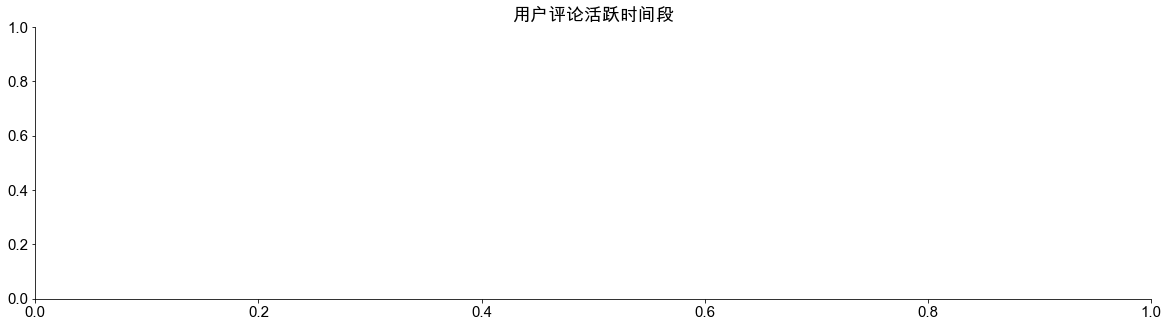

In [57]:
# 解决中文显示问题
font = {'family':'Arial Unicode MS','size' :15}
plt.rc('font',**font)

# 使用 grouby 和 count 来统计 每个小时有多少评论

# 柱状图绘制，关注哪个时间段更活跃

plt.figure(figsize = (20,5))
# 补充 bar
#plt.bar()
plt.title('用户评论活跃时间段')
gca = plt.gca()
gca.spines['right'].set_color('none')
gca.spines['top'].set_color('none')
plt.show()

In [87]:
# 词云图生成
!pip install jieba
!pip install wordcloud

     |████████████████████████████████| 220 kB 1.1 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158428 sha256=79c34c148f7e12f79a333c1336cfac83ef303b326938cc392e79d9953a20f903
  Stored in directory: /Users/haoyuexu/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [65]:
# 把句子变为词
import jieba
my = '我爱学习，学习爱我，我们都是爱学习的好孩子'
# 全模式
s = jieba.cut(my, cut_all = False)
# 精确模式
d = jieba.cut(my, cut_all = True)
r = '~'.join(s)
k = '~'.join(d)
r
#k 

'我~爱~学习~，~学习~爱~我~，~我们~都~是~爱~学习~的~好孩子'

In [68]:
s = jieba.lcut(my)
s

['我',
 '爱',
 '学习',
 '，',
 '学习',
 '爱',
 '我',
 '，',
 '我们',
 '都',
 '是',
 '爱',
 '学习',
 '的',
 '好孩子']

In [97]:
# 从评论中获取词云
recommended = comment['content']
recommended

0       东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...
1                                    安装师傅很给力，热水器也好用，感谢美的。
2                                               还没安装，基本满意
3       电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...
4       用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...
                              ...                        
1995                                  差评，差的一塌糊涂，千万别买，上当了，
1996    热水器还没有安装，就搞一肚子气，安装人员今天推明天，明天推后天，售后安装服务太差，给差评，目...
1997                                          好不容易网购一下还漏电
1998                             东西送的挺快，后期报装2天还没人联系我，售后太差
1999                                 买了两个，送到一个，还有一个至今未送到。
Name: content, Length: 2000, dtype: object

In [103]:
text = ''
for r in recommended:
    ## 去掉无用的词，停用词
    if r == " ":
        continue
    text += r # 把所有recommended内容都合在一起放入 text中
# print(text)
# 下面绘制词云图，需要用到一个字符串，里面包含很多词，词与词之间使用空格进行分割

# 把 ”的“ ”了“ 从list 里删除
text_list = jieba.lcut(text)
for i in text_list:
    if i == "的":
        text_list.remove(i)
    if i == "了":
        text_list.remove(i)
        
data_cut = " ".join(text_list)

    

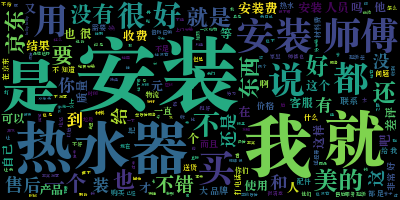

In [104]:
# 绘制词云图
from wordcloud import WordCloud
# 解决文字显示问题
# 声明一个变量用来存储本地字体的路径，你可以上网搜索，windows/mac字体存储路径
# windows 可能为 C：\Windows\Fonts
# 这里是mac的存储路径
font = '/System/Library/Fonts/Supplemental/Songti.ttc'



# 生成词云图
w = WordCloud(font_path = font)
w.generate(data_cut)

# 把这个词云图写在一个图片里
image = w.to_file('comment.png')
# 显示这个图片
from PIL import Image
display(Image.open('comment.png'))

### 租房数据提取（答案）

In [16]:
# 使用正则表达式获取网址
rent['url'] = rent['house_title'].str.extract('(https://.*)')
rent['url']

0       https://m.lianjia.com/chuzu/bj/zufang/BJ218966...
1       https://m.lianjia.com/chuzu/bj/zufang/BJ219100...
2       https://m.lianjia.com/chuzu/bj/zufang/BJ217730...
3       https://m.lianjia.com/chuzu/bj/zufang/BJ211269...
4       https://m.lianjia.com/chuzu/bj/zufang/BJ212014...
                              ...                        
8404    https://m.lianjia.com/chuzu/gz/zufang/GZ209759...
8405    https://m.lianjia.com/chuzu/gz/apartment/layou...
8406    https://m.lianjia.com/chuzu/gz/zufang/GZ216267...
8407    https://m.lianjia.com/chuzu/gz/apartment/layou...
8408    https://m.lianjia.com/chuzu/gz/zufang/GZ202798...
Name: url, Length: 8409, dtype: object

In [20]:
# 拼接几室几厅几卫
# bathroom_num 卫 bedroom_num 室 hall_num 厅
def str_concat(a,b,c):
    return str(a) + '室' + str(b) + '厅' + str(c) + '卫'
rent['户型'] = rent.apply(lambda x: str_concat(x['bedroom_num'],x['hall_num'],x['bathroom_num']),axis = 1)
rent.head()

,_id,bathroom_num,bedroom_num,bizcircle_name,city,dist,distance,frame_orientation,hall_num,house_tag,house_title,rent_area,rent_price_listing,rent_price_unit,resblock_name,type,url,户型
0,5c7145a5397be4c5251a4873,1,2,西罗园,北京,丰台,1101.0,西南,1,近地铁 集中供暖,整租 · 南三环边木樨园桥西宝汇苑带车位西南向两居室！https://m.lianjia.c...,72,6000,元/月,宝汇苑,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ218966...,2室1厅1卫
1,5c714bb4397be4c5251a65c3,2,3,通州北苑,北京,朝阳,132.0,东南,2,近地铁 集中供暖,天时名苑 3室2厅 11000元https://m.lianjia.com/chuzu/bj...,153,11000,元/月,天时名苑,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ219100...,3室2厅2卫
2,5c72b1e9397be4c5251e36fd,2,3,朝阳公园,北京,朝阳,296.0,东北,2,近地铁 精装 双卫生间,整租 · 丽水嘉园 3室2厅 16300元https://m.lianjia.com/chu...,133,16300,元/月,丽水嘉园,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ217730...,3室2厅2卫
3,5c712d6c397be4c5251a015f,1,2,六铺炕,北京,西城,1177.0,南 北,1,精装 集中供暖 随时看房,整租 · 黄寺大街24号院精装修两居室 南北通透 中间楼层https://m.lianjia...,60,8500,元/月,黄寺大街24号院,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ211269...,2室1厅1卫
4,5c714974397be4c5251a5afb,1,2,科技园区,北京,丰台,993.0,南 北,1,近地铁 精装 集中供暖,整租 · 京投银泰万科西华府 2室1厅 7300元https://m.lianjia.com...,83,7300,元/月,京投银泰万科西华府,整租,https://m.lianjia.com/chuzu/bj/zufang/BJ212014...,2室1厅1卫


### 评论数据实战（答案）

In [30]:
comment = pd.read_csv('评论.csv')
comment.head()

,content,creationTime,nickname,referenceName,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos


In [36]:
# 分析用户活跃时间段
comment['hour'] = comment['creationTime'].str.extract(' (\d{2}):')
comment.head()

,content,creationTime,nickname,referenceName,content_type,hour
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,13
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,10
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,10
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,20
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos,09


In [37]:
# 查看有多少个小时的数据
a = np.sort(comment['hour'].unique())
a

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [44]:
# 柱状图绘制，关注哪个时间段更活跃
height = comment.groupby('hour').count()['content']
height

hour
00     35
01     17
02      5
03      5
04      5
05      7
06     17
07     49
08     83
09    115
10    149
11    140
12    108
13    123
14    125
15    117
16    121
17    126
18    112
19    113
20    132
21    125
22    103
23     68
Name: content, dtype: int64

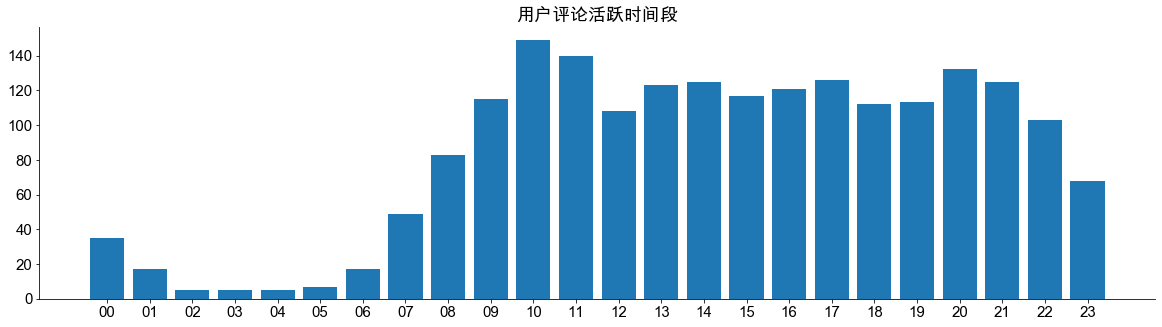

In [52]:
font = {'family':'Arial Unicode MS','size':15}
plt.rc('font',**font)

plt.figure(figsize = (20,5))
plt.bar(a,height = height)
plt.title('用户评论活跃时间段')
gca = plt.gca()
gca.spines['right'].set_color('none')
gca.spines['top'].set_color('none')
plt.show()